In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # type: ignore

# Define data directories
train_dir = r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\mnist\trainingSet'
test_dir = r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\mnist\testingset'

num_classes = 10 

# Image Data Generators with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2, # 20% of images are took for validation phase
    rotation_range=10,   # random rotation
    width_shift_range=0.1,  # random width shift
    height_shift_range=0.1,  # random height shift
    shear_range=0.1,  # shear angle
    zoom_range=0.1,  # random zoom
    horizontal_flip=True  # random horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data using ImageDataGenerator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),   # assuming the images are 28x28
    batch_size=64,
    color_mode='grayscale', # converting to b/w image if any other color are present 
    class_mode='categorical',
    subset='training'       # set as training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'  # set as validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

# Model Definition
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer to prevent overfitting
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer to prevent overfitting
    layers.Conv2D(32, (3, 3), activation='relu'),  
    layers.Flatten(),
    layers.Dense(32, activation='relu'), 
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    layers.Dense(num_classes, activation='softmax')  
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

# Print model summary
model.summary()

# Define Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

# Train the model with Early Stopping and Learning Rate Reduction
history = model.fit(
    train_generator,
    epochs=60,  
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr] # considering earlystopping and controlling the learning rate   
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc * 100)

# Save the model
model.save("number_prediction_model.h5")

# Load the trained model
loaded_model = tf.keras.models.load_model('number_prediction_model.h5')

Found 33604 images belonging to 10 classes.
Found 8396 images belonging to 10 classes.
Found 600 images belonging to 10 classes.


c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


526/526 ━━━━━━━━━━━━━━━━━━━━ 566s 1s/step - accuracy: 0.3228 - loss: 1.8701 - val_accuracy: 0.7594 - val_loss: 0.7364 - learning_rate: 0.0010
Epoch 2/60
526/526 ━━━━━━━━━━━━━━━━━━━━ 478s 904ms/step - accuracy: 0.6548 - loss: 0.9983 - val_accuracy: 0.8319 - val_loss: 0.5052 - learning_rate: 0.0010
Epoch 3/60
526/526 ━━━━━━━━━━━━━━━━━━━━ 130s 244ms/step - accuracy: 0.7273 - loss: 0.7897 - val_accuracy: 0.8728 - val_loss: 0.4165 - learning_rate: 0.0010
Epoch 4/60
526/526 ━━━━━━━━━━━━━━━━━━━━ 319s 607ms/step - accuracy: 0.7575 - loss: 0.6909 - val_accuracy: 0.8953 - val_loss: 0.3368 - learning_rate: 0.0010
Epoch 5/60
526/526 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.7900 - loss: 0.6073 - val_accuracy: 0.9094 - val_loss: 0.2976 - learning_rate: 0.0010
Epoch 6/60
526/526 ━━━━━━━━━━━━━━━━━━━━ 284s 534ms/step - accuracy: 0.8099 - loss: 0.5687 - val_accuracy: 0.9182 - val_loss: 0.2594 - learning_rate: 0.0010
Epoch 7/60
526/526 ━━━━━━━━━━━━━━━━━━━━ 327s 621ms/step - accuracy: 0.8248 - loss

Test accuracy: 98.33333492279053


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted Class: three


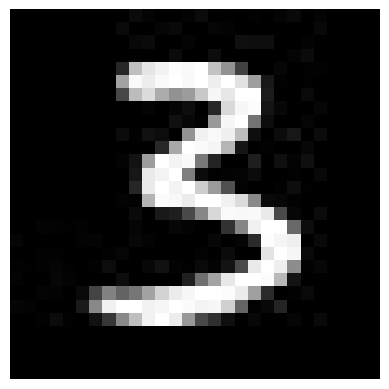

In [28]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('number_prediction_model.h5')

# Define the image path
image_path = r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\mnist\trainingSet\3\img_333.jpg'

# Image dimensions as defined in the model
img_height, img_width = 28, 28

# Load the image in grayscale mode
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale mode
image = cv2.resize(image, (img_width, img_height))  # Resize to match the model's input size

# Preprocess the image
image = image.astype('float32') / 255.0  # Normalize the image
image = np.expand_dims(image, axis=-1)  # Add the channel dimension for grayscale
image = np.expand_dims(image, axis=0)  # Expand dimensions to match the model's input shape (batch_size, height, width, channels)

# Make predictions
predictions = model.predict(image)
class_labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
predicted_class = class_labels[np.argmax(predictions)]

# Print the predicted class
print("Predicted Class:", predicted_class)

# Display the image and prediction
plt.imshow(np.squeeze(image), cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()


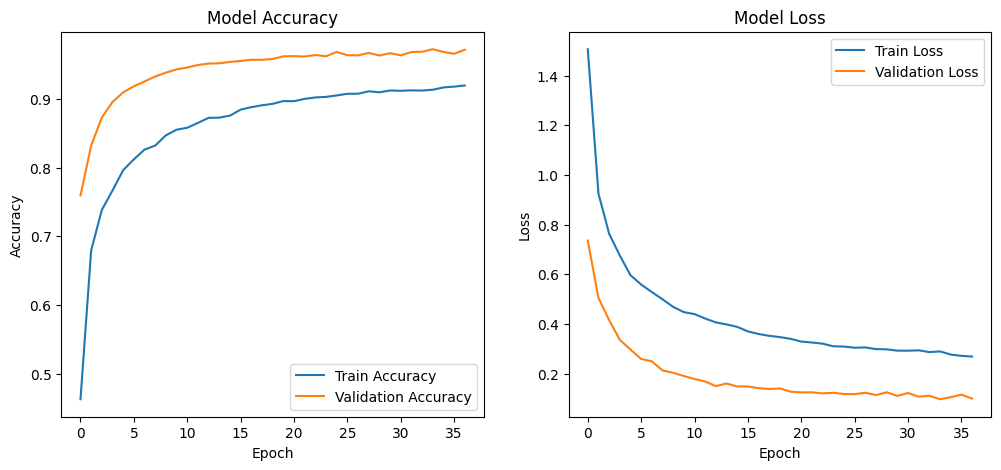

In [31]:
import matplotlib.pyplot as plt
# Step 5: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
